***
# Grouping and aggregation with pandas

## Aggregation and reduction

*Split-apply-combine* operations:

1. *Split* data into groups based on some criteria;
2. *Apply* some function to each group separately; and
3. *Combine* the results into a single `DataFrame` or `Series`.

See [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) for an illustration of such operations.

***
### Aggregations of whole Series or DataFrames

Pandas supports the usual set of aggregation functions, e.g.:

-   [`mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)
-   [`sum()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)
-   [`std()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html), 
    [`var()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html)
-   [`quantile()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)
-   [`count()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html)
-   [`min()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html), 
    [`max()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html)

*Example: compute mean of all numerical columns*

In [1]:
import pandas as pd

# Relative path to data directory
DATA_PATH = '../../data'

# Path to Titanic passenger data CSV file
file = f'{DATA_PATH}/titanic.csv'

# Read in Titanic passenger data, set PassenderId column as index
df = pd.read_csv(file, index_col='PassengerId')

In [3]:
df.max(numeric_only = True)

Survived      1.0000
Pclass        3.0000
Age          80.0000
Fare        512.3292
dtype: float64

<div class="alert alert-info">
<h3> Your turn</h3>
Use the Titanic data set to perform the following aggregations:
<ol>
    <li>Compute the median age (column <TT>Age</TT>).</li>
    <li>Compute the fraction of female passengers (use the information in column <TT>Sex</TT>).</li>
</ol>
</div>

In [4]:
df['Age'].median()

28.0

In [21]:
df.query('Sex == "female"').count() / len(df)

Survived    0.352413
Pclass      0.352413
Name        0.352413
Sex         0.352413
Age         0.292929
Ticket      0.352413
Fare        0.352413
Cabin       0.108866
Embarked    0.350168
dtype: float64

In [22]:
(df['Sex'] == 'female').mean()

np.float64(0.35241301907968575)

***
### Aggregations of subsets of data (grouping)

-   We group data using the [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) method
    -   Groups are defined based on values of columns or the index, usually a categorical variable or an identifier for a household/individual/firm/period/...
    -   Can group by *multiple* columns or index levels at once
-   We can apply aggregations *by group*

*Example: apply groupby-operations to Titanic data*

-   Tabulate number of obserations by class (column `Pclass`) using 
    [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)
-   Group by passenger class, compute average of numerical columns

In [24]:
classes = df['Pclass'].unique()

In [26]:
for c in classes:
    m = df[df['Pclass'] == c]['Age'].mean()
    print(m)
    

25.14061971830986
38.233440860215055
29.87763005780347


#### Built-in aggregations used with `groupby()`

- [`mean()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.mean.html):
    averages within each group
- [`sum()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.sum.html):
    sum values within each group
- [`std()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.std.html), 
    [`var()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.var.html): 
    within-group standard deviation and variance
-   [`median()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.median.html):
    compute median within each group
- [`quantile()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.quantile.html):
    compute quantiles within each group
- [`size()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.size.html): 
    number of observations in each group
- [`count()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.count.html):
    number of non-missing observations in each group
- [`first()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.first.html), 
    [`last()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.last.html): 
    first and last elements in each group
-   [`min()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.min.html), 
    [`max()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.max.html): 
    minimum and maximum elements within a group

See the [official documentation](https://pandas.pydata.org/docs/user_guide/groupby.html#built-in-aggregation-methods) for a complete list.

*Example: Number of elements within each group*

-   Note: `size()` and `count()` are two different functions!

In [27]:
groups = df.groupby('Pclass')

groups['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

*Example: Return first observation of each group*

In [28]:
groups.size()

Pclass
1    216
2    184
3    491
dtype: int64

In [29]:
groups.count()

,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,
1,216,216,216,186,216,216,176,214
2,184,184,184,173,184,184,16,184
3,491,491,491,355,491,491,12,491


In [30]:
groups['Age'].first()

Pclass
1    38.0
2    14.0
3    22.0
Name: Age, dtype: float64

<div class="alert alert-info">
<h3> Your turn</h3>
Use the Titanic data set to perform the following aggregations:
<ol>
    <li>Compute the average survival rate by sex (stored in the <TT>Sex</TT> column). You need to use the survival indicator stored in the column <tt>Survived</tt> for this.</li>
    <li>Count the number of passengers aged 50+. Compute the average survival rate by sex for this group.</li>
    <li>Count the number of passengers below the age of 20 by class and sex. Compute the average survival rate for this group by class and sex.</li>
</ol>
</div>

In [47]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
df_1 = df.query('50 < Age')

df_1.groupby('Sex')['Survived'].mean()

Sex
female    0.941176
male      0.127660
Name: Survived, dtype: float64

In [45]:
len(df_1)

64

In [44]:
df_2 = df.query('Age < 20')

df_2.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.928571
        2         1.000000
        3         0.533333
male    1         0.571429
        2         0.526316
        3         0.190476
Name: Survived, dtype: float64

***
#### Writing custom aggregations

-   Sometimes we want to use aggregations *not* implemented in pandas
-   Use [`agg()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)
    to perform custom aggregations
-   Important: `agg()` operates on a single column at a time (cannot combine data from multiple columns)

    -   Use [`apply()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.apply.html) to perform aggregations based on multiple columns

*Example: compute mean via `agg()`*

-   Compute mean age by class (`Pclass`)

In [50]:
df.groupby('Pclass')['Age'].agg('mean')

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

*Example: custom aggregation*

-   Compute fraction of passengers aged 40+ by class

In [55]:
import numpy as np
def fcn(x):
    frac = np.mean(40 < x)
    return frac

In [56]:
fcn(df['Age'])

np.float64(0.16835016835016836)

In [57]:
df.groupby('Pclass')['Age'].agg(fcn)

Pclass
1    0.351852
2    0.184783
3    0.081466
Name: Age, dtype: float64

In [58]:
df.groupby('Pclass')['Age'].agg(lambda x: np.mean(40 < x))

Pclass
1    0.351852
2    0.184783
3    0.081466
Name: Age, dtype: float64

***
#### Applying multiple functions at once

-  Applying multiple functions to a **single** column

    -   Functions are passed in as a *list*

-  Applying multiple functions to **multiple** columns

    -   Use so-called *named aggregation*
    -   Columns and functions are passed in as a *dictionary*:

    ```python
    groups.agg(
        new_column_name1=('column_name1', 'operation1'),
        new_column_name2=('column_name2', 'operation2'),
        ...
    )
    ```


*Example: Applying multiple functions to a **single** column*

-   Compute mean *and* median age by class

In [59]:
df.groupby('Pclass')['Age'].agg(['mean', 'median'])

,mean,median
Pclass,,
1,38.233441,37.0
2,29.877630,29.0
3,25.140620,24.0


*Example: Applying multiple functions to **multiple** columns*

-   Compute the following by class in a single call to `agg()`:
    1.  Mean age
    2.  Maximum fare (column `Fare`)

In [61]:
df.groupby('Pclass').agg(
    avg_age = ('Age', 'mean'), 
    max_fare = ('Fare', 'mean'))

,avg_age,max_fare
Pclass,,
1,38.233441,84.154687
2,29.877630,20.662183
3,25.140620,13.675550


<div class="alert alert-info">
<h3> Your turn</h3>
Use the Titanic data set to perform the following aggregations:
<ol>
    <li>Compute the minimum, maximum and average age by embarkation port (stored in the column <TT>Embarked</TT>) in a single <TT>agg()</TT> operation.
    There are several ways to solve this problem.</li>
    <li>Compute the number of passengers, the average age and the fraction of women by embarkation port in a single <TT>agg()</TT> operation. 
    <br/>
    <i>Hint:</i>To compute the fraction of women, you can either use a <TT>lambda</TT> expressions, or you first create a numerical indicator variable for females
    (as we did in the workshop).
    </li>
</ol>
</div>

In [64]:
df.groupby('Embarked')['Age'].agg(['max', 'min', 'mean'])

,max,min,mean
Embarked,,,
C,71.0,0.42,30.814769
Q,70.5,2.00,28.089286
S,80.0,0.67,29.445397


In [69]:
df.groupby('Embarked').agg(
    avg_age = ('Age', 'mean'),
    wom_port = ('female', 'mean'))

KeyError: "Column(s) ['female'] do not exist"

***
## Transformations

-   Same principle as aggregations, but number of observations remains unchanged
-   Useful for computations that involve individual and aggregate data
-   Performed with [`transform()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html)

*Example: assign group-specific mean*

- Compute average fare by class, assign result to each observation

In [ ]:
df['Avg_fare'] = df.groupby('Pclass')['Fare'].transform('mean')

PassengerId
1      13.675550
2      84.154687
3      13.675550
4      84.154687
5      13.675550
         ...    
887    20.662183
888    84.154687
889    13.675550
890    84.154687
891    13.675550
Name: Fare, Length: 891, dtype: float64

*Example: Deviation from average fare*

-   For each passenger, compute difference between passenger's fare and average fare in their class

<div class="alert alert-info">
<h3> Your turn</h3>
Use the Titanic data set to perform the following aggregations:
<ol>
    <li>Compute the <i>excess</i> fare paid by each passenger relative to the minimum fare by embarkation port and class, i.e., compute <i>Fare - min(Fare)</i>
        by port and class.</li>
</ol>
</div>

***
## Resampling and aggregation

### Digression: Working with time series data (see lecture 2)

-   Pandas indices can be date or datetime data types
-   Use [`date_range()`](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html) to create a range of dates
-   Use [`to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) to convert existing data to datetime format

*Example: Creating a date index*

-   Create a demo data set of daily observations for the first 3 months of 2024

In [ ]:
# Start and end dates used for demo data set
start = '2024-01-01'
end = '2024-03-31'

index = pd.date_range(start = start, end = end, freq = 'D')

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
               '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01',
               '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05',
               '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09',
               '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13',
               '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17',
               '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23', '2024-02-24', '2024-02-25',
      

In [73]:
pd.Series(np.arrange, len(index), index = index)

AttributeError: module 'numpy' has no attribute 'arrange'

*Example: Select particular date*

-   Select observation from January 1, 2024

*Example: Select date range*

- Select first 5 days in January 2024

*Example: Use a partial index*

- Select all of January 2024

***
### Resampling time series data

-   Use [`resample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) to aggregate time series data to lower frequency
-   Argument to `resample()` determines frequency and index of resulting data, e.g.:

    -   `'YE'` aggregation to years, index is end of year
    -   `'QE'` aggregation to quarters, index is end of quarter
    -   `'ME'` aggregation to months, index is end of month
    -   `'W'` aggregations to weeks

*Example: Resampling the NASDAQ index*

In [74]:
# Path to NASDAQ data file
file = f'{DATA_PATH}/stockmarket/NASDAQ.csv'

# Read in NASDAQ data, set Date column as index
df = pd.read_csv(file, index_col='Date', parse_dates=True)

# Keep observations for 2024
df = df.loc['2024']

<Axes: xlabel='Date'>

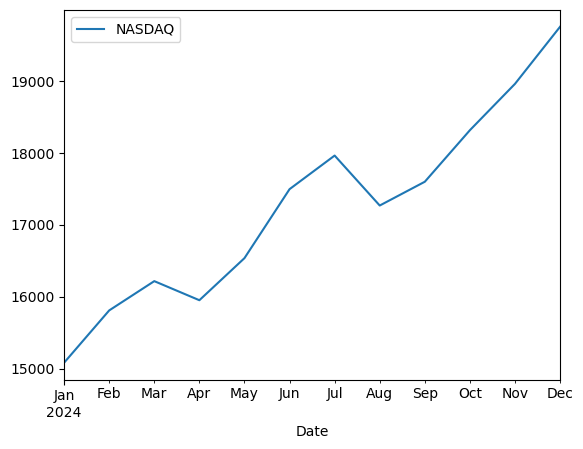

In [77]:
df.resample('ME').mean().plot()

<div class="alert alert-info">
<h3> Your turn</h3>
<p>
Use the daily NASDAQ data for 2024 and compute the percentage change from the first to the last trading day within each month.
</p>
</div>